In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv("../data_train_fillna.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,0.0,52.0,0.0,10.0,918.222222,882.0,94.903200,310.0,0.472670,-0.949065,...,10.0,9.0,524.000000,11430.000000,147.250000,3440.937500,71.250000,2477.937500,171.200000,1482.560000
1,1.0,35.0,1.0,9.0,1138.500000,1145.0,22.555487,64.0,-0.461107,-1.286145,...,8.0,8.0,469.000000,1016.000000,146.285714,10377.632653,55.500000,12749.750000,168.250000,461.437500
2,2.0,45.0,1.0,10.0,896.666667,944.0,204.320010,646.0,-1.350073,0.489157,...,11.0,10.0,478.400000,1852.640000,123.600000,5864.640000,20.800000,7330.560000,124.909091,3343.537190
3,3.0,72.0,0.0,16.0,587.333333,588.0,22.623488,106.0,-1.644839,4.250959,...,12.0,11.0,395.142857,4358.693878,76.000000,2091.000000,-40.000000,3449.142857,42.333333,11889.222222
4,1.0,68.0,0.0,9.0,1035.000000,1032.0,31.336879,90.0,0.346377,-1.297847,...,9.0,0.0,410.895810,2039.462769,122.920761,3154.034717,21.669423,3522.522691,206.666667,552.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,2.0,53.0,0.0,11.0,914.200000,912.0,15.810123,52.0,0.592631,-0.592510,...,11.0,10.0,423.555556,364.246914,62.444444,236.246914,-28.888889,295.209877,124.000000,2024.727273
8512,1.0,78.0,1.0,8.0,1131.142857,1056.0,123.417328,282.0,0.939151,-1.104222,...,8.0,7.0,517.714286,70.204082,128.285714,10653.061224,58.857143,11244.408163,175.500000,576.750000
8513,3.0,71.0,1.0,15.0,612.000000,612.0,2.000000,6.0,0.857143,-0.285714,...,15.0,1.0,394.000000,0.000000,156.000000,0.000000,86.000000,0.000000,130.133333,26.382222
8514,3.0,28.0,1.0,20.0,488.105263,488.0,3.006917,12.0,0.003346,-0.463470,...,15.0,19.0,273.200000,1626.560000,130.421053,656.243767,57.684211,1234.216066,110.133333,1379.448889


In [3]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [4]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [5]:
df_test = pd.read_csv("../data_test_fillna.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,1.0,62.0,1.0,8.0,1170.571429,1168.0,16.273178,42.0,0.650965,-1.237999,...,8.0,8.0,458.571429,24.816327,132.000000,43.428571,33.428571,62.530612,164.500000,235.750000
1,3.0,74.0,1.0,18.0,533.647059,532.0,4.405093,12.0,0.290425,-1.358307,...,14.0,17.0,353.571429,952.673469,144.823529,195.792388,40.352941,911.640138,69.000000,284.428571
2,3.0,79.0,1.0,17.0,571.375000,573.0,5.372092,18.0,-0.962004,-0.290856,...,13.0,14.0,427.500000,1328.750000,102.714286,1640.346939,1.714286,2415.918367,102.153846,69.207101
3,1.0,56.0,1.0,9.0,1038.000000,1039.0,19.442222,68.0,-0.563330,0.000420,...,9.0,5.0,513.200000,2108.160000,110.400000,2899.840000,-31.600000,2002.240000,171.333333,49.777778
4,0.0,70.0,1.0,25.0,393.333333,392.0,3.248931,14.0,1.537888,2.495402,...,0.0,23.0,410.895810,2039.462769,122.920761,3154.034717,21.669423,3522.522691,99.852469,2078.683018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,64.0,0.0,10.0,1031.777778,1034.0,60.003292,248.0,0.096327,1.069329,...,9.0,9.0,414.000000,1331.555556,108.888889,1453.432099,-4.444444,1383.802469,93.600000,135.040000
2126,2.0,67.0,1.0,13.0,722.166667,723.0,6.504272,22.0,-0.859445,-0.264470,...,13.0,12.0,413.500000,389.416667,132.666667,2414.888889,76.666667,2498.888889,181.384615,2109.159763
2127,3.0,46.0,1.0,17.0,586.000000,586.0,6.855655,28.0,-0.046553,-0.258488,...,16.0,16.0,412.875000,768.984375,57.500000,1077.250000,-41.625000,779.109375,44.800000,6084.693333
2128,0.0,69.0,1.0,10.0,918.222222,840.0,214.508108,684.0,1.333096,0.602620,...,10.0,5.0,370.000000,16614.000000,253.500000,2402.750000,158.000000,1650.000000,108.800000,4868.160000


In [6]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [7]:
x_test = scale.transform(x_test)

In [8]:
lr_clf = LogisticRegression(C= 1, max_iter= 200, penalty= 'l2', solver= 'sag')
rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features= 'sqrt', n_estimators= 1000)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 50)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, p= 1, weights= 'distance')
svc_clf = SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.1,max_depth= 4,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'sqrt',splitter= 'best')

In [9]:
# Huấn luyện các mô hình con
# lr_clf.fit(x_train,y_train)
# rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(max_depth=5, max_features='sqrt')

In [10]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    # lr_clf.predict_proba(x_train),
    # rf_clf.predict_proba(x_train),
    ab_clf.predict_proba(x_train),
    knn_clf.predict_proba(x_train),
    svc_clf.predict_proba(x_train),
    xgb_clf.predict_proba(x_train),
    dt_clf.predict_proba(x_train)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    # lr_clf.predict_proba(x_test),
    # rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [11]:
print(f"X_train_meta:{X_train_meta.shape}")
print(f"X_test_meta:{X_test_meta.shape}")

X_train_meta:(8516, 20)
X_test_meta:(2130, 20)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
params = {
    'n_estimators': [10,50,100,1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3,4,5],
    'max_features':['sqrt', 'log2'],
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=(train=0.998, test=0.999) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=50;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=50;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=50;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=100;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END criterion=gini

In [13]:
result_test = grid_model.predict(X_test_meta)

In [14]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [15]:
grid_model.best_score_

1.0

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

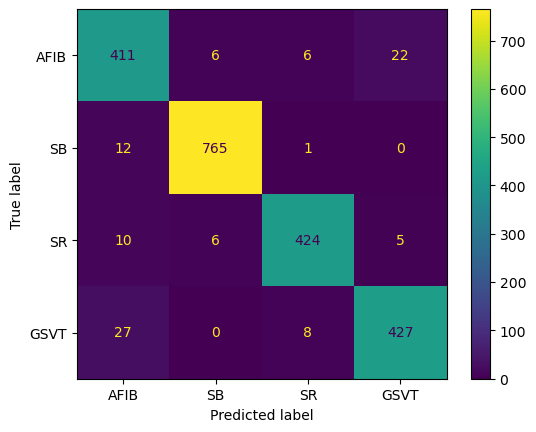

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.961033,0.923596,0.893478,0.908287,0.970920
1,SB,0.988263,0.983290,0.984556,0.983923,0.991124
2,SR,0.983099,0.952809,0.965831,0.959276,0.991098
3,GSVT,0.970892,0.924242,0.940529,0.932314,0.983813
4,macro avg,NaN,0.945950,0.946099,0.945984,NaN
5,micro avg,NaN,0.951643,0.951643,0.951643,NaN
6,weighted avg,NaN,0.951778,0.952066,0.951643,NaN


In [17]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [18]:
# df_evaluation_test.to_csv("../Result/Blending_RF_fillna.csv")